In [1]:
import pandas as pd
import numpy as np
from IPython.display import clear_output

path_tr = '/content/drive/MyDrive/CommonLit/input/train.csv'
path_test = '/content/drive/MyDrive/CommonLit/input/test.csv'
path_sub = '/content/drive/MyDrive/CommonLit/input/sample_submission.csv'

[Textstat](https://github.com/shivam5992/textstat) - это простая в использовании библиотека для расчета статистики по тексту. Он помогает определить удобочитаемость, сложность и уровень обучения.

In [2]:
!pip install textstat
clear_output()

# Description
**Task:** To build algorithms to rate the complexity of reading passages for grade 3-12 classroom use.

**Data**
> train/tets
> - id  - uniques
> - url  - source txt
> - license - license source txt
> - excerpt - text
> - target - reading ease (легкость чтения)
> - standard_error - measure of spread of scores among multiple raters for each excerpt. Not included for test data (мера разброса оценок между несколькими оценщиками для каждого отрывка)

**Metric**

$$RMSE = \sqrt{\frac{1}{n}}{\sum_{i=1}^n(y_i - \hat{y_i})^2}$$

# Data

In [3]:
df = pd.read_csv(path_tr)
df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [ ]:
pd.read_csv(path_test).head()

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2834 non-null   object 
 1   url_legal       830 non-null    object 
 2   license         830 non-null    object 
 3   excerpt         2834 non-null   object 
 4   target          2834 non-null   float64
 5   standard_error  2834 non-null   float64
dtypes: float64(2), object(4)
memory usage: 133.0+ KB


# Simple preprocessing

In [34]:
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
# from termcolorn import colored

In [ ]:
def clean_text(txt):
    return re.sub('[^A-Za-z]+', ' ',str(txt).lower())
txt = df.excerpt[0]
txt

'When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThese rugs were for prizes, one for the girls and one for the boys. And this was the game.\nThe girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.\nThis would have been an easy matter, but each traveller was obliged to wear snowshoes.'

In [ ]:
clean_text(txt)

'when the young people returned to the ballroom it presented a decidedly changed appearance instead of an interior scene it was a winter landscape the floor was covered with snow white canvas not laid on smoothly but rumpled over bumps and hillocks like a real snow field the numerous palms and evergreens that had decorated the room were powdered with flour and strewn with tufts of cotton like snow also diamond dust had been lightly sprinkled on them and glittering crystal icicles hung from the branches at each end of the room on the wall hung a beautiful bear skin rug these rugs were for prizes one for the girls and one for the boys and this was the game the girls were gathered at one end of the room and the boys at the other and one end was called the north pole and the other the south pole each player was given a small flag which they were to plant on reaching the pole this would have been an easy matter but each traveller was obliged to wear snowshoes '

# EDA


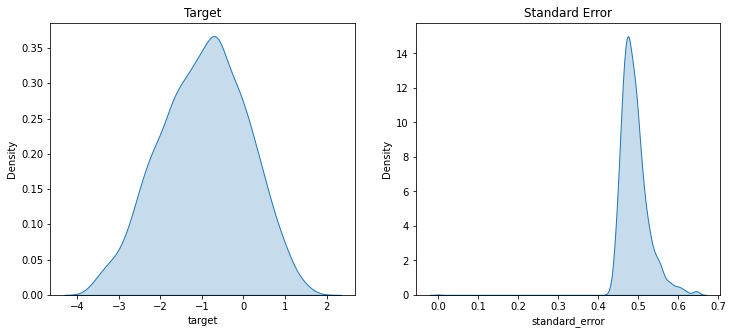

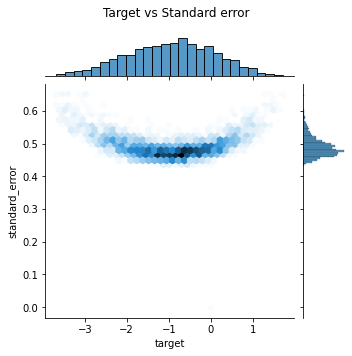

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12, 5))
sns.kdeplot(
    df['target'],
    shade = True,
    ax = ax[0]
)
sns.kdeplot(
    df['standard_error'],
    shade = True,
    ax = ax[1]
)
ax[0].set_title("Target")
ax[1].set_title("Standard Error")
plt.show()
sns.jointplot(x=df['target'],
              y=df['standard_error'],
              kind='hex',
              height=5,
              )
plt.suptitle("Target vs Standard error")
plt.subplots_adjust(top=0.90)

plt.show()

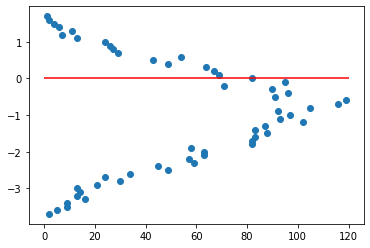

In [ ]:
a = df.target.round(1).value_counts()
plt.scatter(x=a.values, y=a.index)
plt.hlines([0], xmin=0, xmax=120, color='red')


## license

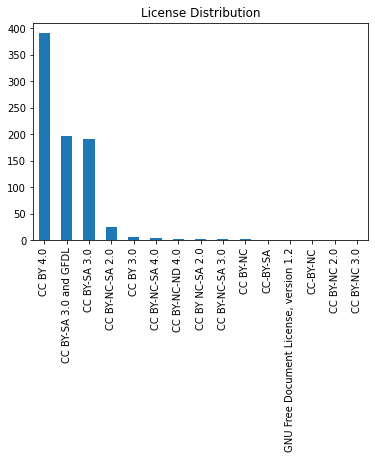

In [ ]:
df.license.value_counts().plot(kind='bar')
plt.title("License Distribution")
plt.show()

## uniques count

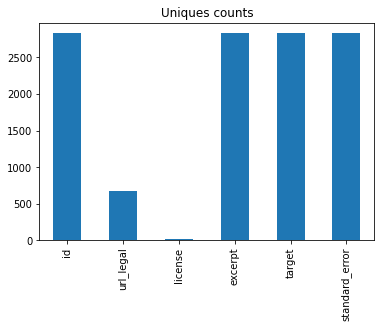

In [ ]:
df.nunique().plot(kind='bar')
plt.title("Uniques counts")
plt.show()

## Distribution text/words length vs target

In [ ]:
df['txt_len'] = df.excerpt.apply(lambda x: len(x))
df['words_len'] = df.excerpt.str.split().apply(lambda x: len(x))
df.head(2)

,id,url_legal,license,excerpt,target,standard_error,txt_len,words_len
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,992,179
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,937,169


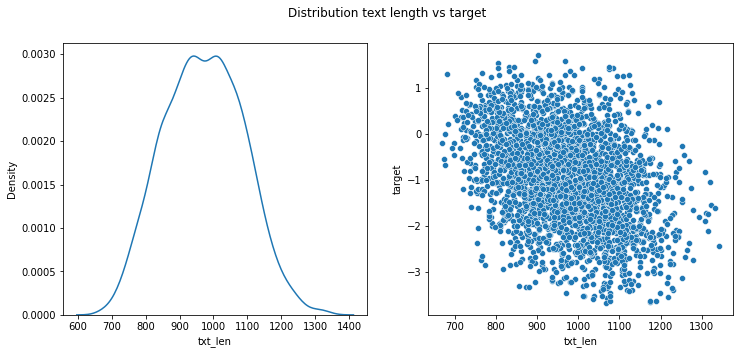

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12, 5))
plt.suptitle('Distribution text length vs target')
sns.kdeplot(data=df, x = 'txt_len', ax = ax[0])
sns.scatterplot(data = df, x = 'txt_len', y = 'target',ax = ax[1])
plt.show()

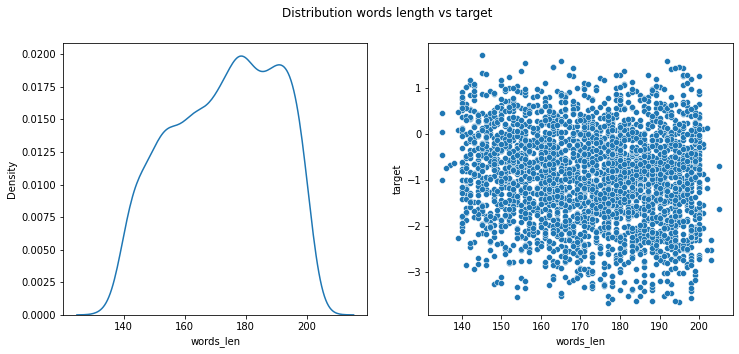

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12, 5))
plt.suptitle('Distribution words length vs target')
sns.kdeplot(data=df, x = 'words_len', ax = ax[0])
sns.scatterplot(data = df, x = 'words_len', y = 'target',ax = ax[1])
plt.show()

In [ ]:
df['txt'] = df['excerpt'].apply(lambda x: clean_text(x))
df['txt_len_clear'] = df.txt.apply(lambda x: len(x))
df['words_len_clear'] = df.txt.str.split().apply(lambda x: len(x))

In [ ]:
fig = ff.create_distplot(
    [df[['words_len', 'words_len_clear']][c] for c in df[['words_len', 'words_len_clear']].columns],
     df[['words_len', 'words_len_clear']].columns, bin_size=1)
fig['layout'].update(title='Compare clear words length and default')
fig.show()

In [ ]:
fig = ff.create_distplot(
    [df[['txt_len', 'txt_len_clear']][c] for c in df[['txt_len', 'txt_len_clear']].columns],
                         df[['txt_len', 'txt_len_clear']].columns, bin_size=5)
fig['layout'].update(title='Compare clear text length and default')
fig.show()

## url_legal counts source

In [ ]:
df.url_legal.dropna().str.split('/').apply(lambda x: x[2]).value_counts()

simple.wikipedia.org          196
kids.frontiersin.org          191
en.wikipedia.org              176
www.africanstorybook.org      164
www.commonlit.org              41
freekidsbooks.org              19
www.digitallibrary.io          19
en.wikibooks.org                8
static.ehe.osu.edu              6
drive.google.com                3
www.ck12.org                    2
ukuqonda.co.za                  2
sites.ehe.osu.edu               1
emedia.uen.org                  1
beyondpenguins.ehe.osu.edu      1
Name: url_legal, dtype: int64

## statistic by textstat

In [8]:
import textstat

In [ ]:
txt = df.excerpt[0]
txt

'When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThese rugs were for prizes, one for the girls and one for the boys. And this was the game.\nThe girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.\nThis would have been an easy matter, but each traveller was obliged to wear snowshoes.'

### Sentence Count(количество предложений)

In [ ]:
textstat.sentence_count(txt)

11

### Возвращает показатель легкости чтения по Флешу.

| Score |Difficulty|
|-------|----------|
90-100	|Very Easy
80-89	|Easy
70-79	|Fairly Easy
60-69	|Standard
50-59	|Fairly Difficult
30-49	|Difficult
0-29	|Very Confusing

In [ ]:
textstat.flesch_reading_ease(txt)

80.31

### Индекс автоматизированной читабельности
textstat.automated_readability_index (текст)
Возвращает ARI (индекс автоматической читаемости), который выводит число, которое приблизительно соответствует уровню обучения, необходимому для понимания текста.

In [ ]:
textstat.automated_readability_index(txt)

8.3

### Оценка читаемости по Дейлу-Чаллу
textstat.dale_chall_readability_score (текст)
В отличие от других тестов, он использует поисковую таблицу из 3000 наиболее часто используемых английских слов. Таким образом, он возвращает уровень успеваемости по Новой формуле Дейла-Чалла.

Оценка понятна:
- 4,9 или ниже средний ученик 4-го класса или ниже
- 5,0–5,9 средний ученик 5-6 класса
- 6.0–6.9 средний ученик 7 или 8 класса
- 7,0–7,9 средний ученик 9 или 10 класса
- 8,0–8,9 средний ученик 11 или 12 класса
- 9,0–9,9 в среднем учащийся 13-15 классов колледжа


In [ ]:
textstat.dale_chall_readability_score(txt)

6.65

### Консенсус читаемости, основанный на всех вышеперечисленных тестах
textstat.text_standard (текст, float_output = False)
На основе всех вышеперечисленных тестов возвращает примерный класс школы, необходимый для понимания текста.

Необязательный float_output позволяет возвращать счет в виде числа с плавающей запятой. По умолчанию False.

In [ ]:
textstat.text_standard(txt, float_output=True)

'8th and 9th grade'

In [22]:
def add_stat(data: pd.DataFrame) -> None:
    method = [
              'sentence_count',
              'flesch_reading_ease',
              'dale_chall_readability_score',
              'text_standard'
              ]

    for i in range(data.shape[0]):      
        txt = data.iloc[i].excerpt
        for mth in method:
            data.loc[i, mth] = getattr(textstat, mth)(txt)

In [23]:
add_stat(df)
df['flesch_reading_ease'] = df['flesch_reading_ease'].astype('int')
df['source'] = df.url_legal.fillna('https://fillnan').str.split('/').apply(lambda x: x[2])

#### Eda + statistic

Text(0.5, 1.0, 'Gruped by source and flesch, after sum gruped flesch\n(100 * 90 = easy, 60-69 = standart, 0-29 = difficult)')

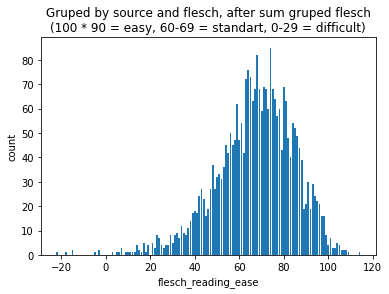

In [ ]:
a = df.groupby(['source', 'flesch_reading_ease'])['target'].count()
aa = a.droplevel(level='source').groupby('flesch_reading_ease').sum()
plt.bar(aa.index.values, height=aa.values, )
plt.ylabel('count')
plt.xlabel('flesch_reading_ease')
plt.title('Gruped by source and flesch, after sum gruped flesch'
          '\n'
          '(100 * 90 = easy, 60-69 = standart, 0-29 = difficult)'
          );

In [ ]:
drop = [
 'www.ck12.org',
 'ukuqonda.co.za',
 'sites.ehe.osu.edu',
 'beyondpenguins.ehe.osu.edu',
 'drive.google.com',
 'emedia.uen.org'
]
"""dropped because small count in data, not relevant"""
df.groupby('source')['target'].count()

source
beyondpenguins.ehe.osu.edu       1
drive.google.com                 3
emedia.uen.org                   1
en.wikibooks.org                 8
en.wikipedia.org               176
fillnan                       2004
freekidsbooks.org               19
kids.frontiersin.org           191
simple.wikipedia.org           196
sites.ehe.osu.edu                1
static.ehe.osu.edu               6
ukuqonda.co.za                   2
www.africanstorybook.org       164
www.ck12.org                     2
www.commonlit.org               41
www.digitallibrary.io           19
Name: target, dtype: int64

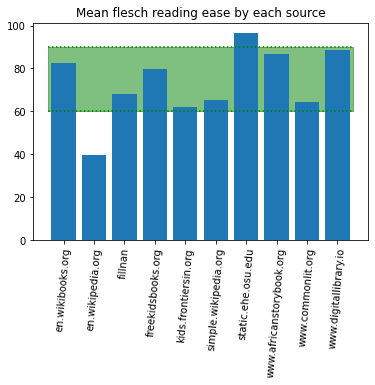

In [ ]:
df = df[~df.source.isin(drop)].reset_index()



a = df.groupby(['source'])['flesch_reading_ease'].mean()
plt.bar(a.index.values,a.values)
# linestyles{'solid', 'dashed', 'dashdot', 'dotted'}, optional
plt.hlines([90], xmin=-0.5, xmax=9.5, color='green', linestyles = 'dotted')
plt.hlines([60], xmin=-0.5, xmax=9.5, color='green', linestyles = 'dotted')
plt.fill_between([-0.5, 9.5], [60], [90], color='green',
                 alpha=0.5)
plt.xticks(rotation = 85)
plt.title('Mean flesch reading ease by each source');

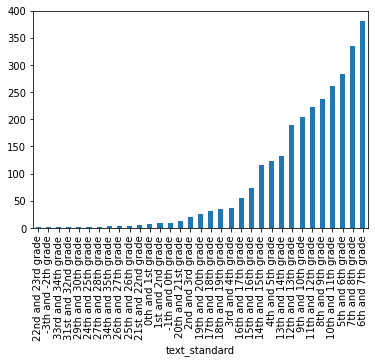

In [ ]:
df.groupby('text_standard')['target'].count().sort_values(kind = ['index']).plot(kind= 'bar')

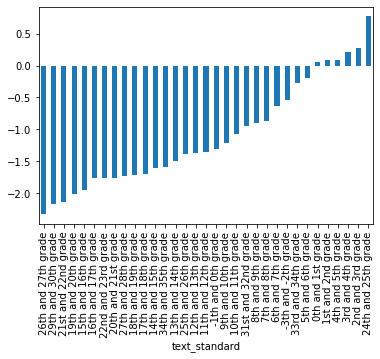

In [ ]:
df.groupby('text_standard')['target'].mean().sort_values(kind = ['index']).plot(kind= 'bar')

##### idea show what is highest, medium and lowest target

In [18]:
a = df[df.target == df.target.max()]
textstat.text_standard(a.excerpt.values[0], float_output=False)

'6th and 7th grade'

In [21]:
a = df[df.target >= df.target.mean()]
textstat.text_standard(a.excerpt.values[0], float_output=False)

'8th and 9th grade'

In [19]:
a = df[df.target == df.target.min()]
textstat.text_standard(a.excerpt.values[0], float_output=False)

'14th and 15th grade'

In [31]:
df[df.flesch_reading_ease == df.flesch_reading_ease.max()].iloc[0]

id                                                                      c2b70247e
url_legal                                                                     NaN
license                                                                       NaN
excerpt                         A little pine tree was in the woods.\nIt had n...
target                                                                    0.56648
standard_error                                                           0.559053
sentence_count                                                                 25
flesch_reading_ease                                                           114
dale_chall_readability_score                                                 0.46
text_standard                                                   2nd and 3rd grade
source                                                                    fillnan
Name: 1532, dtype: object

In [30]:
df[df.flesch_reading_ease >= df.flesch_reading_ease.mean()].iloc[0]

id                                                                      c12129c31
url_legal                                                                     NaN
license                                                                       NaN
excerpt                         When the young people returned to the ballroom...
target                                                                  -0.340259
standard_error                                                           0.464009
sentence_count                                                                 11
flesch_reading_ease                                                            80
dale_chall_readability_score                                                 6.65
text_standard                                                   8th and 9th grade
source                                                                    fillnan
Name: 0, dtype: object

In [32]:
df[df.flesch_reading_ease == df.flesch_reading_ease.min()].iloc[0]

id                                                                      6788643be
url_legal                                                                     NaN
license                                                                       NaN
excerpt                         The principal subjects, concerning which Presi...
target                                                                   -2.56346
standard_error                                                            0.62235
sentence_count                                                                  2
flesch_reading_ease                                                           -22
dale_chall_readability_score                                                12.58
text_standard                                                 12th and 13th grade
source                                                                    fillnan
Name: 1167, dtype: object

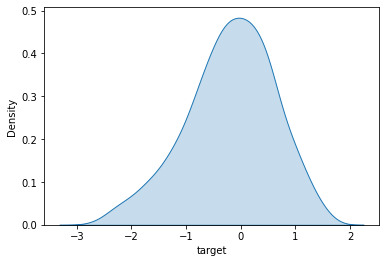

In [38]:
df80 = df[df.flesch_reading_ease >= 80]
sns.kdeplot(
    df80['target'],
    shade = True,
)

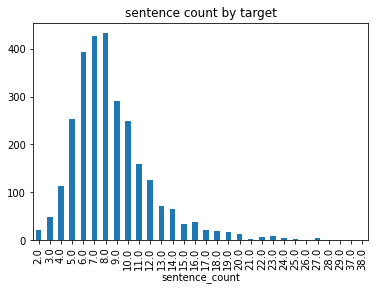

In [ ]:
df.groupby('sentence_count')['target'].count().plot(kind = 'bar')
plt.title('sentence count by target');

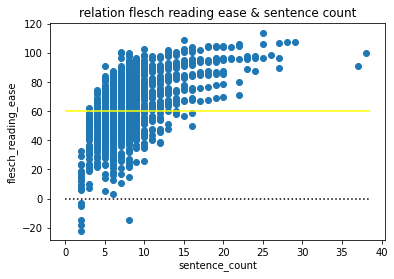

In [ ]:
a = df.groupby(['sentence_count', 'flesch_reading_ease'])['target'].count()
aa = a.to_frame().reset_index()
plt.scatter(aa.sentence_count, aa.flesch_reading_ease)
plt.hlines([0], xmin=0, xmax=38.5, color='black', linestyles = 'dotted')
plt.hlines([60], xmin=0, xmax=38.5, color='yellow')
plt.xlabel('sentence_count')
plt.ylabel('flesch_reading_ease')
plt.title('relation flesch reading ease & sentence count');

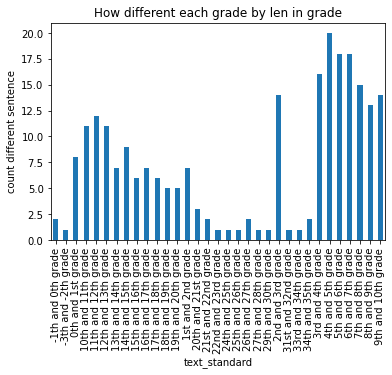

In [ ]:
a = df.groupby(['text_standard', 'sentence_count'])['target'].count()
a.groupby('text_standard').count().plot(kind='bar')
plt.title('How different each grade by len in grade')
plt.ylabel('count different sentence');

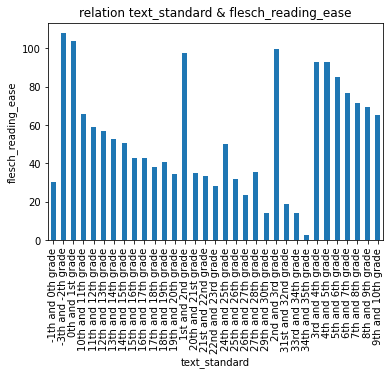

In [ ]:
df.groupby(['text_standard'])['flesch_reading_ease'].mean().plot(kind='bar')
plt.title('relation text_standard & flesch_reading_ease')
plt.ylabel('flesch_reading_ease');

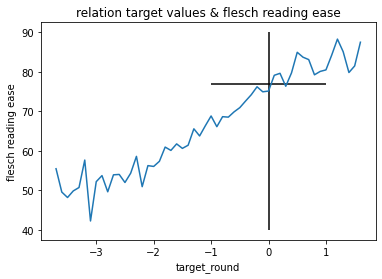

In [ ]:
df['target_round'] = df['target'].round(1)
df.groupby(['target_round'])['flesch_reading_ease'].mean().plot()
plt.vlines([0], ymin=40, ymax=90, color='black')
plt.hlines([77], xmin=-1, xmax=1, color='black')
plt.title('relation target values & flesch reading ease')
plt.ylabel('flesch reading ease');

# Summary

**EDA:**

>- normally distributed with a mean of about -1 sd mean 0.5
> - only 15 licenses, most of the texts do not have them, **skip**
>- text length most from 850-1100
>- number of words from 150 до 190
>- sources (url) there are not many of them, most of the texts without specifying the source 2000, 6 sources with a minimum amount of text I excluded from eda
>- after cleaning, the distributions do not change, which means cleaning should help
>- most of the texts are in the range of 50-90 difficulty
>- text standard splits the text into groups (number of values for each group), you can see that there is growth starting from 0 th - 6 th
>- most of the texts consist of 5-10 sentences
>-dependence of the number of sentences and complexity, with increasing complexity decreases
>- each group contains text of different lengths (this is what we count), there are groups with 10-19 and 3-9 with maximum values
>-the dependence of the difficulty of reading and the group,
we see decreasing 11-17th == 60 standard and
less than 10th 60-100
>-distribution of the target (rounded, less noise) and complexity, there is a change of the target sign to plus when passing the cutoff of difficulty of 75

**Idea:**
> - make folds by use(flesch&sentence)
> - two model eda with(plus&minus target)
> - two model by group grade 10 - 20 and 0-10
> - folds by sentence

